# **EDA**

In [36]:
#Importacion de librerias
import pandas as pd
from statsforecast import StatsForecast
import os
from statsforecast.models import MSTL, AutoARIMA
import matplotlib.pyplot as plt

In [37]:
#Leer los datos y filtrar los datos de interes
df = pd.read_csv(os.path.join("refined", "top_aerolinea.csv"))
df = df[df.Nombre_Empresa_clean == "AVIANCA"].copy()
df["Fecha"] = pd.to_datetime(df["Fecha"])
df = df.sort_values("Fecha")

In [38]:
Y_df = pd.DataFrame()
Y_df["ds"] = pd.to_datetime(df["Fecha"])
Y_df["unique_id"] = df["Nombre_Empresa_clean"]
Y_df["y"] = df["pasajeros"]

#Datos desde los ultimos 10 años
Y_df2 = pd.DataFrame()
ind_2015 = Y_df.ds>=pd.to_datetime("2013-01-01")
Y_df2 = Y_df[ind_2015].copy()

In [39]:
StatsForecast.plot(Y_df)


In [40]:
# Create a list of models and instantiation parameters
models = [MSTL(
    season_length=[12, 12*5], # seasonalities of the time series 
    trend_forecaster=AutoARIMA() # model used to forecast trend
)]


sf = StatsForecast(
    models=models, # model used to fit each time series 
    freq='M', # frequency of the data
)
#Fits the model 
sf = sf.fit(df=Y_df)

In [41]:
sf2 = StatsForecast(
    models=models, # model used to fit each time series 
    freq='M', # frequency of the data
)
sf2 = sf2.fit(df=Y_df2)

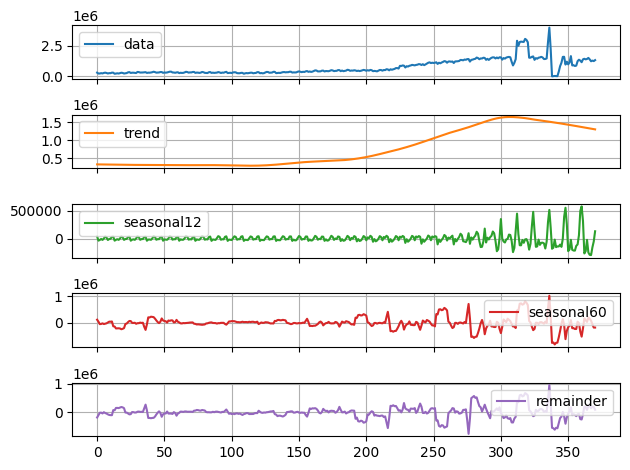

In [42]:
#Plots the trend and seasonality
sf.fitted_[0, 0].model_.tail(24 * 28).plot(subplots=True, grid=True)
plt.tight_layout()
plt.show()

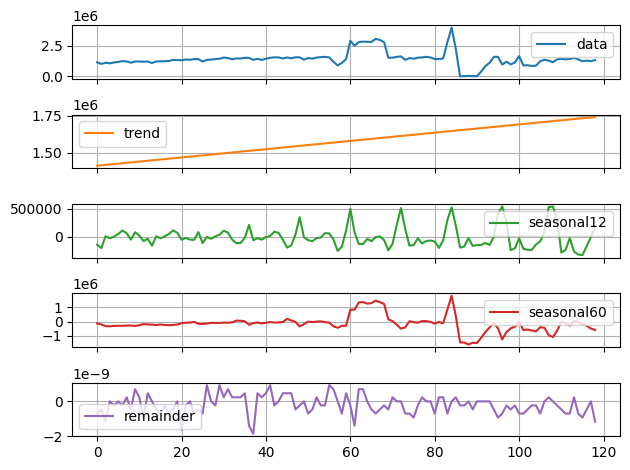

In [43]:
#Plots the trend and seasonality
sf2.fitted_[0, 0].model_.tail(24 * 28).plot(subplots=True, grid=True)
plt.tight_layout()
plt.show()

In [44]:
## Features
from tsfeatures import tsfeatures
tsfeatures(Y_df, freq=12)


,unique_id,hurst,series_length,unitroot_pp,unitroot_kpss,hw_alpha,hw_beta,hw_gamma,stability,nperiods,...,entropy,crossing_points,arch_lm,x_acf1,x_acf10,diff1_acf1,diff1_acf10,diff2_acf1,diff2_acf10,seas_acf1
0,AVIANCA,1.059759,371,-22.137914,4.45778,1.0,0.0,7.457022e-12,0.842311,1,...,0.426234,19,0.528783,0.927606,5.523168,0.163597,0.164174,-0.254152,0.217969,0.689258


In [46]:
import numpy as np

# Generate a sample time series data
np.random.seed(123)
ts_data = np.random.normal(size=100)

# Compute time series features
ts_features = tsfeatures(ts_data, features=["acf_features", "entropy", "frequency", "heterogeneity"])

# Print the feature values
print(ts_features)

AttributeError: 'numpy.ndarray' object has no attribute 'groupby'